In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv('cs-training.csv', index_col = 0)

df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [117]:


df['MissingDependent'] = df['NumberOfDependents'].isnull().astype(int)
df['MissingIncome'] = df['MonthlyIncome'].isnull().astype(int)

df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)





C:\Users\awais\AppData\Local\Temp\ipykernel_9224\2489979403.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)


In [118]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MissingDependent,MissingIncome
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,0,0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0,0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0,0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0,0


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df_known = df[df['MonthlyIncome'].notnull()]
df_unknown = df[df['MonthlyIncome'].isnull()]

features = df.columns.drop('MonthlyIncome')

X_train = df_known[features]
y_train = df_known['MonthlyIncome']

X_pred = df_unknown[features]

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

predicted_income = rf.predict(X_pred)

df.loc[df['MonthlyIncome'].isnull(), 'MonthlyIncome'] = predicted_income



In [120]:
df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
MissingDependent                        0
MissingIncome                           0
dtype: int64

In [121]:
df['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

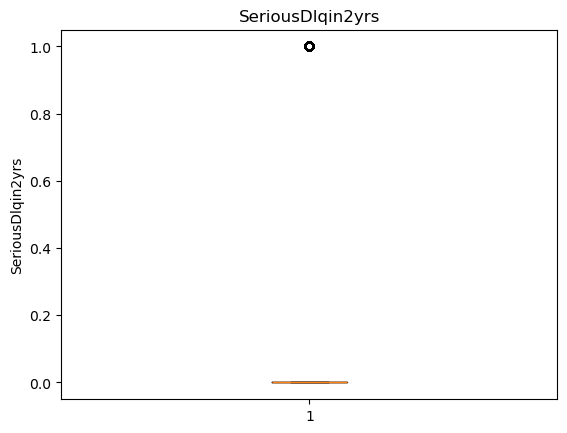

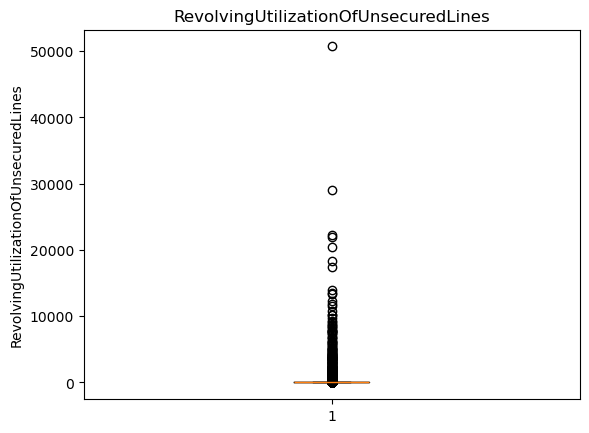

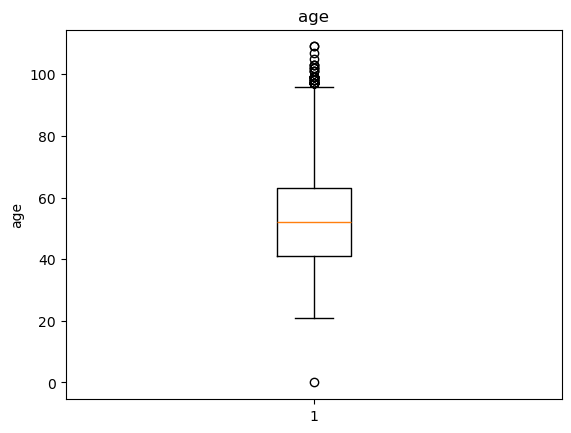

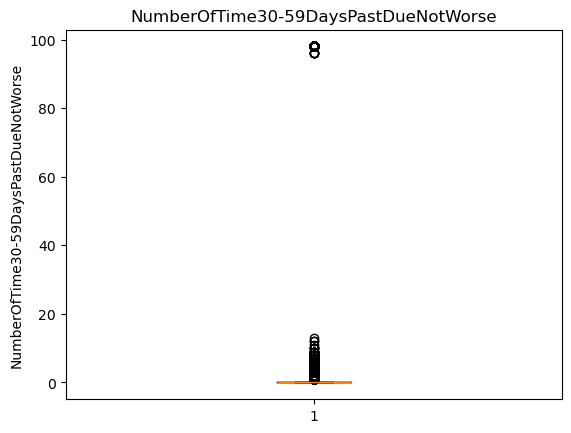

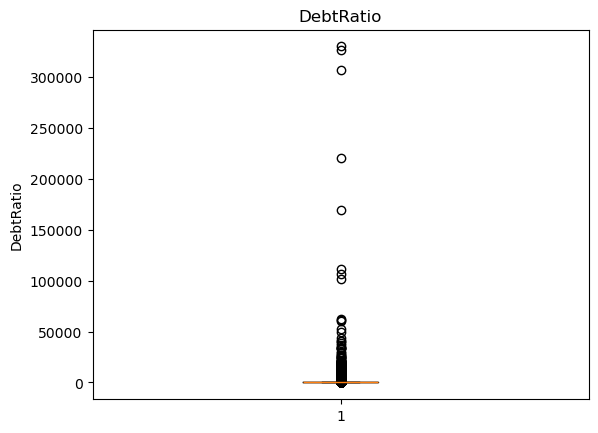

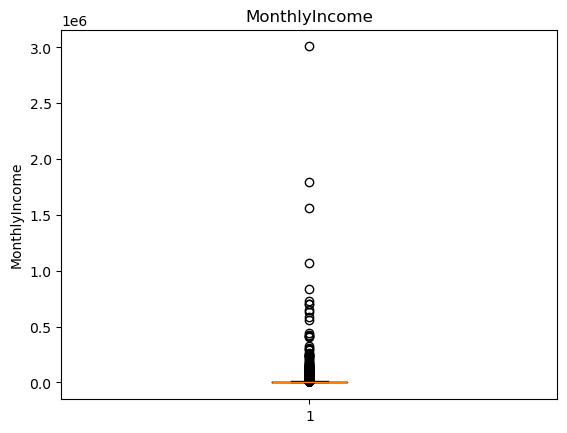

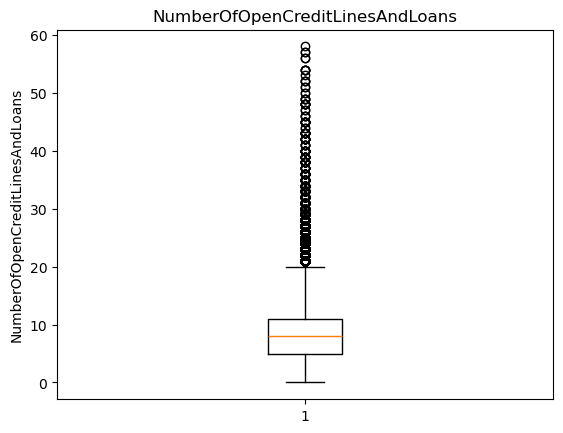

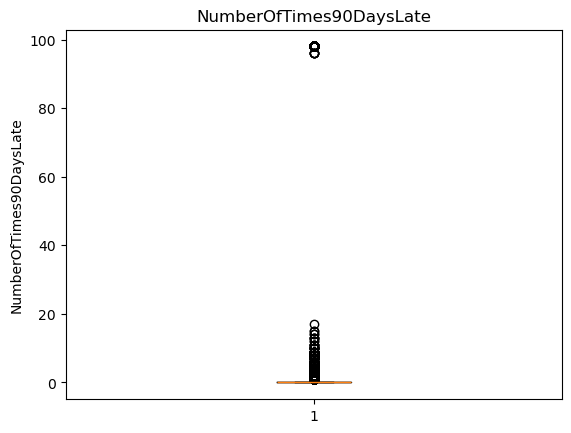

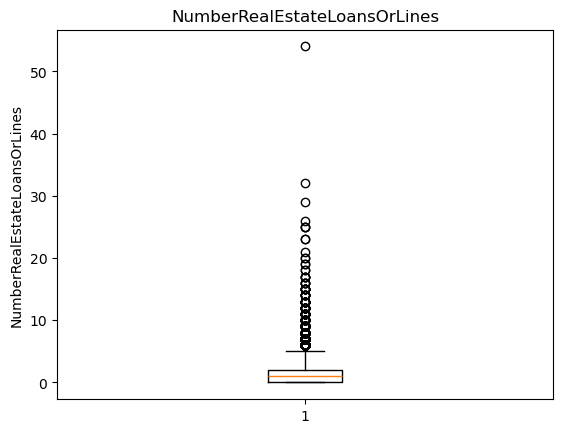

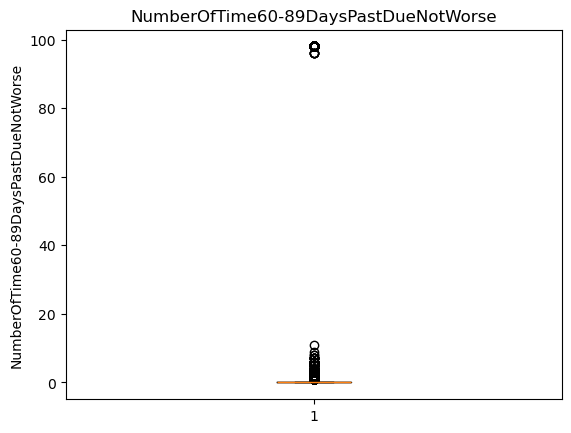

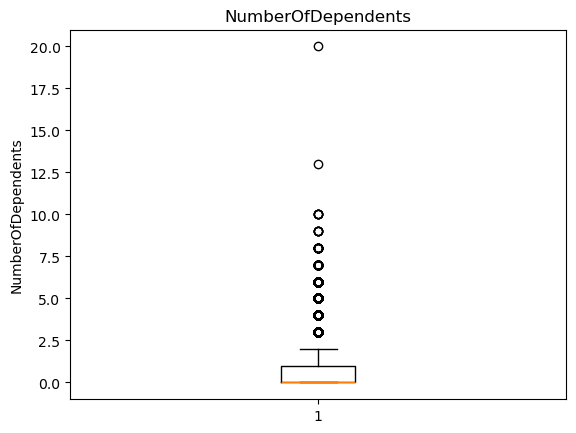

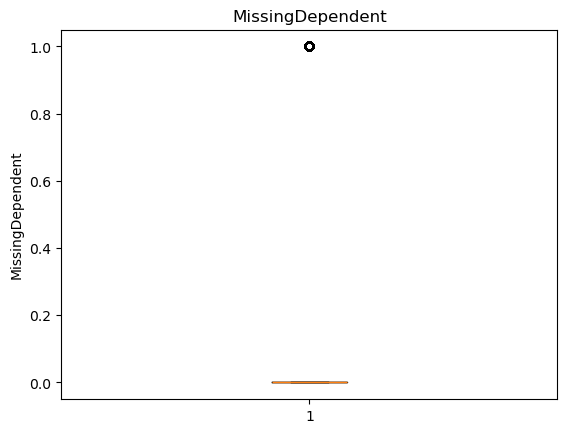

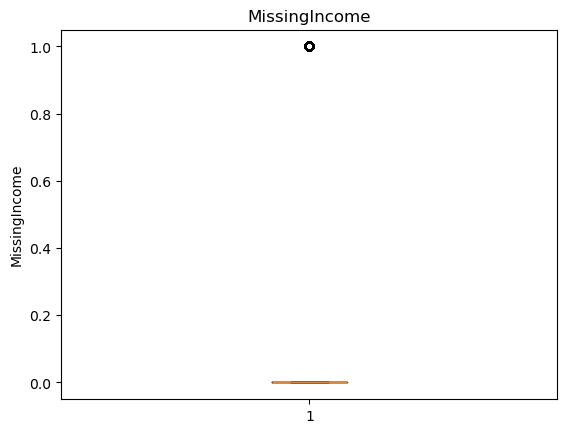

In [122]:
for i in df:
    plt.boxplot(df[i])
    plt.title(i)
    plt.ylabel(i)
    plt.show()


#revolvingutilazation, numberofdays, debtratio,numberoftimeslate, number realeastelona, 
                

In [123]:

# debtratio,numberoftimeslate, number realeastelona, 



# Calculate Q1 and Q3
Q1 = df['DebtRatio'].quantile(0.25)
Q3 = df['DebtRatio'].quantile(0.75)

# Interquartile range
IQR = Q3 - Q1

# Outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


print(f"{upper_bound}")
print(f"{lower_bound}")



1.9080236847499998
-0.8646960792499998


In [124]:
steve = df[df['NumberOfDependents'] >= 17]

steve


df = df[df['DebtRatio'] < 20000]

df = df[df['NumberRealEstateLoansOrLines'] < 40]

df = df[df['NumberOfDependents'] < 15]




In [125]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MissingDependent,MissingIncome
count,149955.000000,149955.000000,149955.000000,149955.000000,149955.000000,1.499550e+05,149955.000000,149955.000000,149955.000000,149955.000000,149955.000000,149955.000000,149955.000000
mean,0.066813,5.994625,52.293788,0.421000,334.470823,5.420369e+03,8.451042,0.266020,1.017178,0.240432,0.737408,0.026135,0.198026
std,0.249699,248.866653,14.772149,4.193366,1042.293794,1.326304e+04,5.143012,4.169922,1.118407,4.155799,1.105981,0.159536,0.398513
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029876,41.000000,0.000000,0.174999,1.800000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154170,52.000000,0.000000,0.366403,4.410840e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.559053,63.000000,0.000000,0.866677,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,50708.000000,109.000000,98.000000,19378.000000,3.008750e+06,57.000000,98.000000,32.000000,98.000000,13.000000,1.000000,1.000000


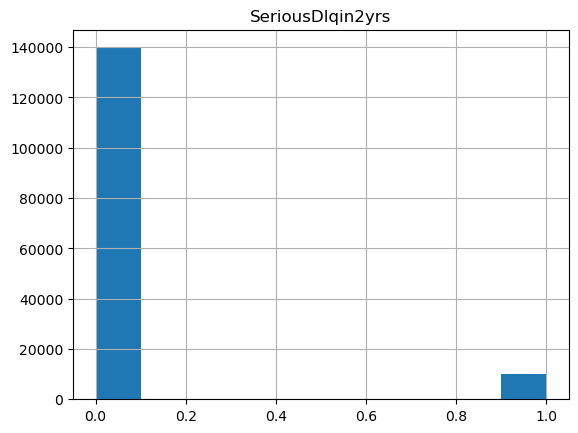

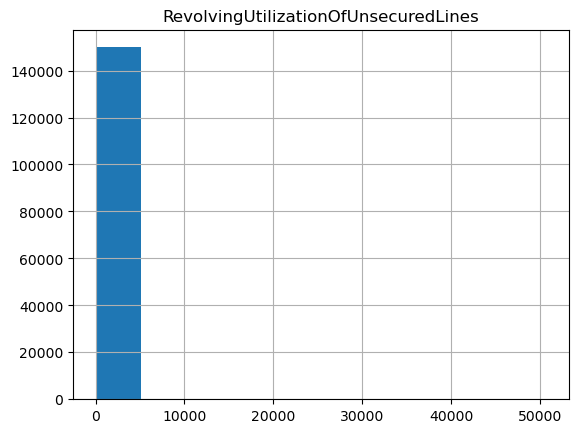

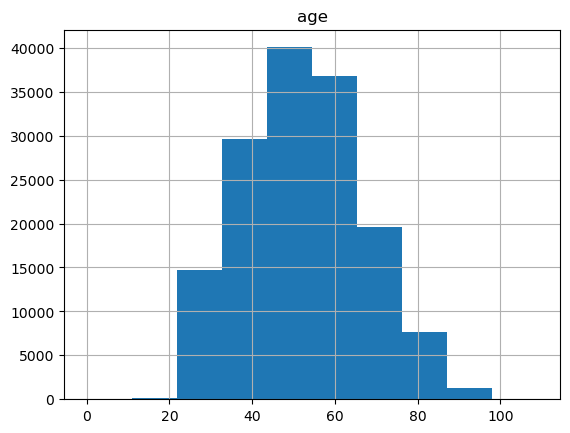

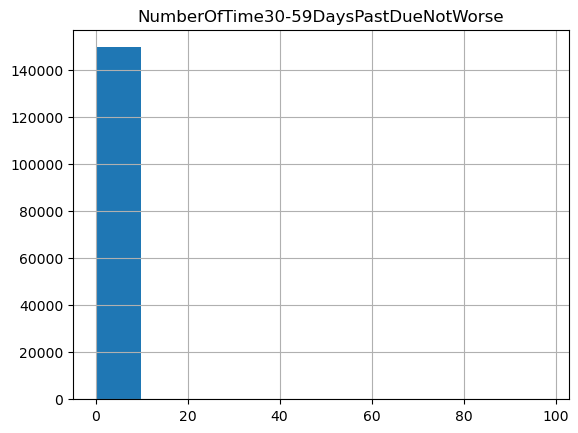

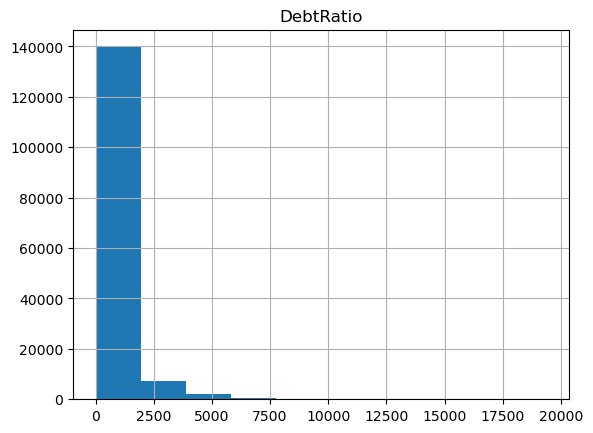

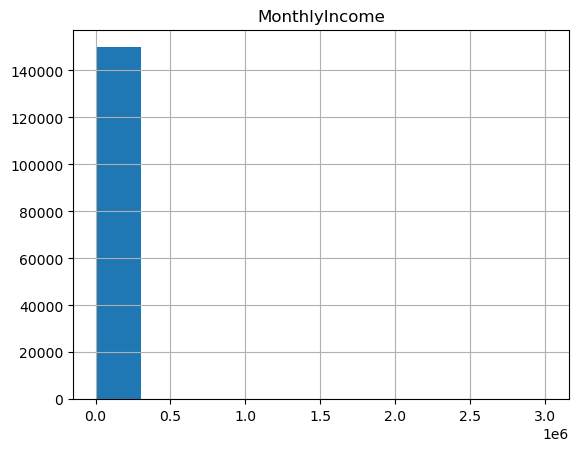

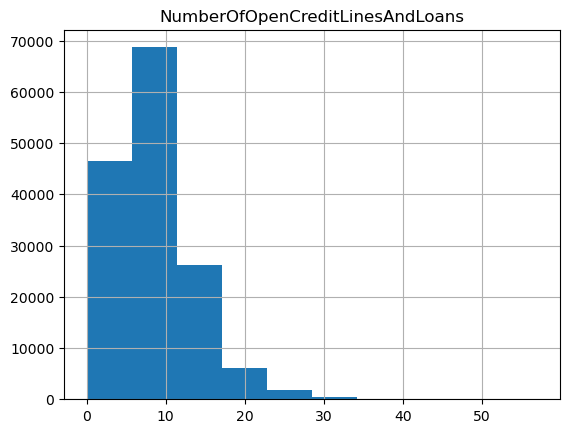

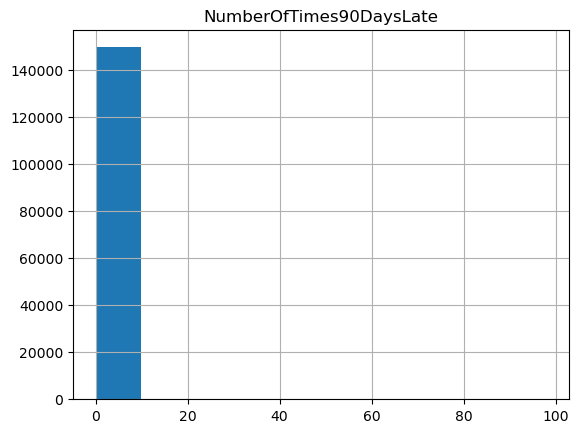

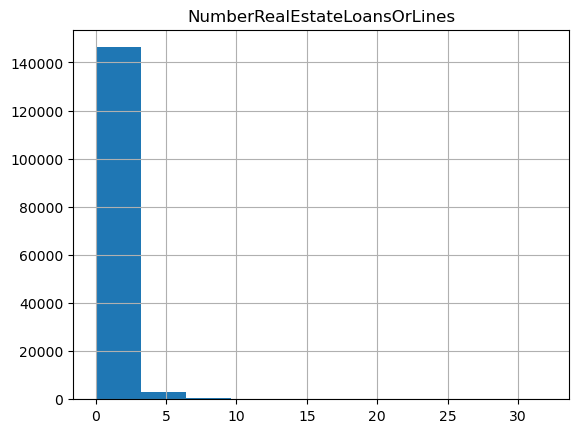

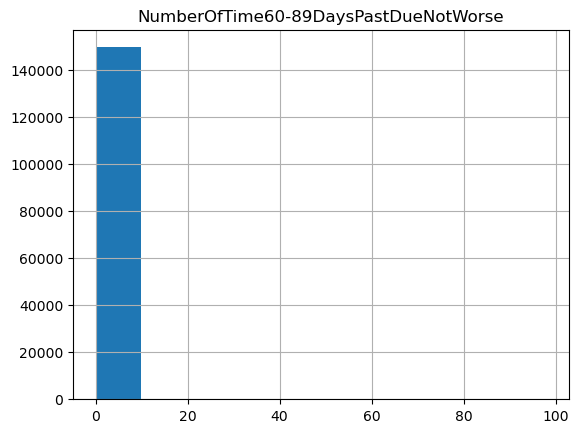

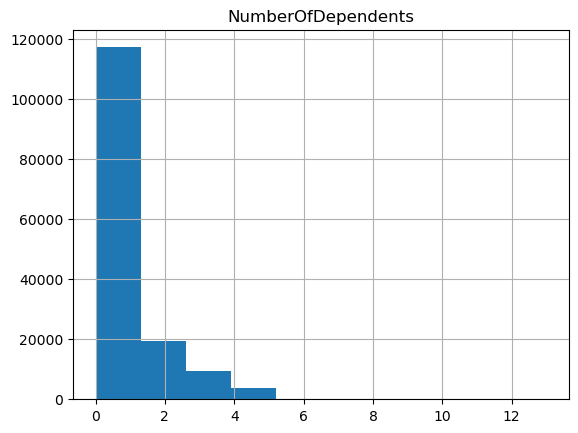

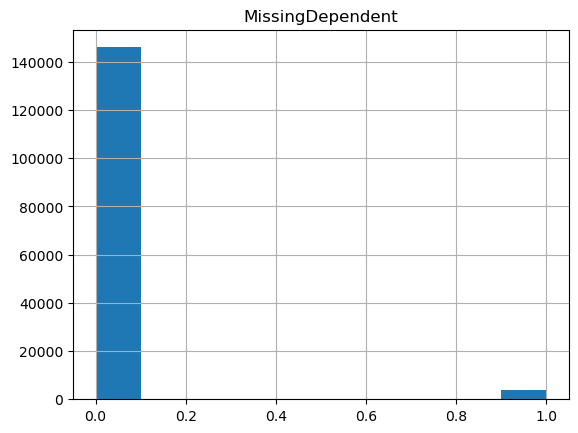

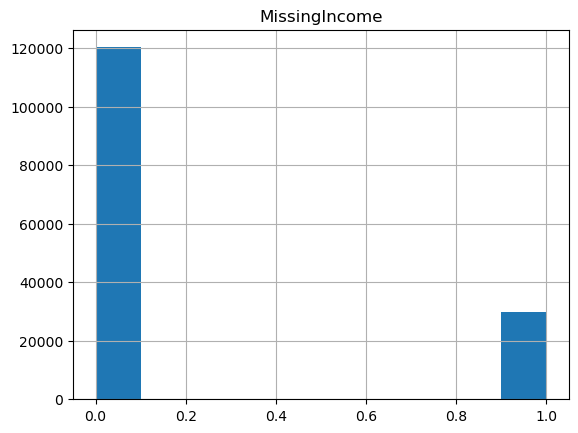

In [126]:
for i in df:
    df[i].hist()
    plt.title(i)
    plt.show()

In [127]:
#debtratio, numberofdependents, numberofopencreditsandliens
df.skew()

SeriousDlqin2yrs                          3.469712
RevolvingUtilizationOfUnsecuredLines     98.462164
age                                       0.188986
NumberOfTime30-59DaysPastDueNotWorse     22.594441
DebtRatio                                 4.949878
MonthlyIncome                           117.438820
NumberOfOpenCreditLinesAndLoans           1.210279
NumberOfTimes90DaysLate                  23.083974
NumberRealEstateLoansOrLines              2.810509
NumberOfTime60-89DaysPastDueNotWorse     23.328273
NumberOfDependents                        1.595934
MissingDependent                          5.940634
MissingIncome                             1.515523
dtype: float64

In [128]:
log_features = [
    'RevolvingUtilizationOfUnsecuredLines',
    'NumberOfTime30-59DaysPastDueNotWorse',
    'DebtRatio',
    'MonthlyIncome',
    'NumberOfTimes90DaysLate',
    'NumberRealEstateLoansOrLines',
    'NumberOfTime60-89DaysPastDueNotWorse'
]

# Apply log1p and overwrite original columns
for col in log_features:
    df[col] = np.log1p(df[col])


In [129]:
df.skew()

SeriousDlqin2yrs                         3.469712
RevolvingUtilizationOfUnsecuredLines    11.687171
age                                      0.188986
NumberOfTime30-59DaysPastDueNotWorse     4.273597
DebtRatio                                1.748558
MonthlyIncome                           -1.482124
NumberOfOpenCreditLinesAndLoans          1.210279
NumberOfTimes90DaysLate                  8.811458
NumberRealEstateLoansOrLines             0.234785
NumberOfTime60-89DaysPastDueNotWorse    10.606580
NumberOfDependents                       1.595934
MissingDependent                         5.940634
MissingIncome                            1.515523
dtype: float64

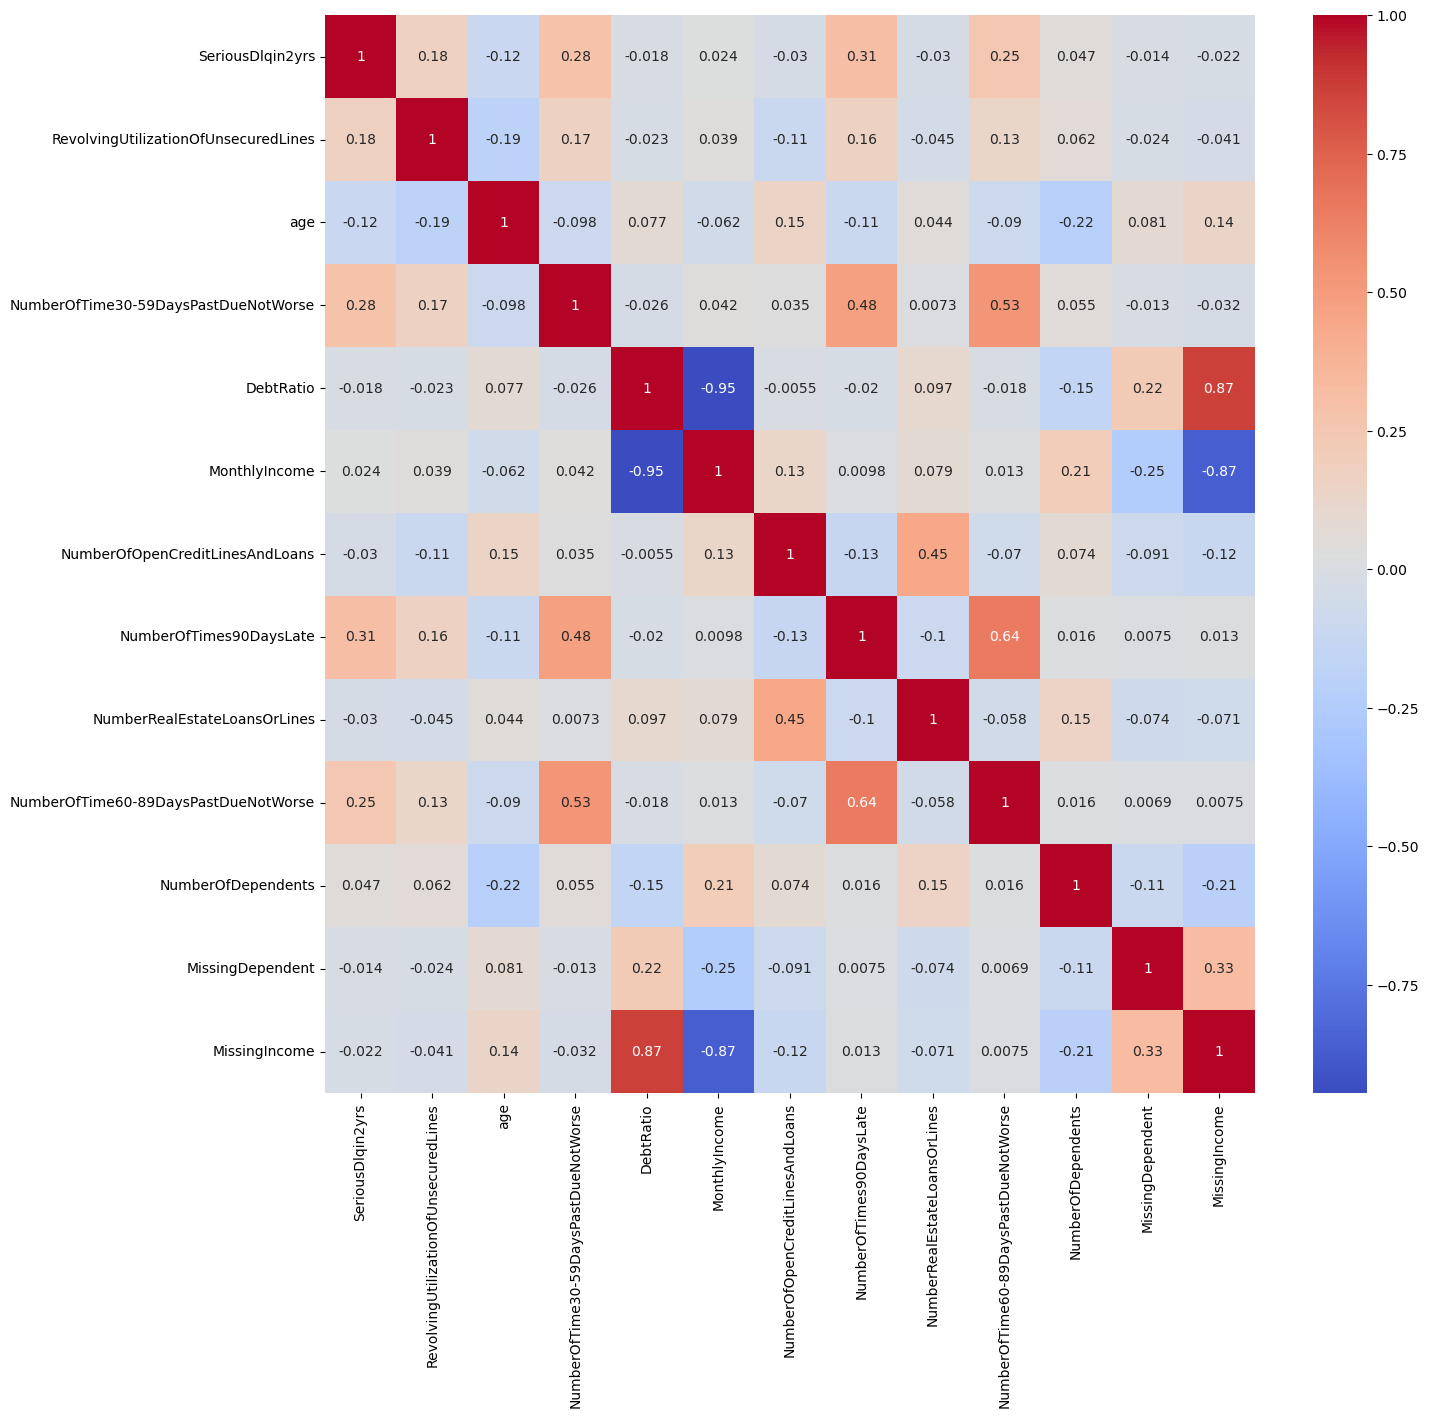

In [130]:
plt.figure(figsize=(15,14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [131]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MissingDependent,MissingIncome
1,1,0.568789,45,1.098612,0.589442,9.118335,13,0.000000,1.945910,0.0,2.0,0,0
2,0,0.671490,40,0.000000,0.115002,7.863651,4,0.000000,0.000000,0.0,1.0,0,0
3,0,0.505721,38,0.693147,0.081684,8.020599,2,0.693147,0.000000,0.0,0.0,0,0
4,0,0.210107,30,0.000000,0.035415,8.101981,5,0.000000,0.000000,0.0,0.0,0,0
5,0,0.645657,49,0.693147,0.024620,11.060196,7,0.000000,0.693147,0.0,0.0,0,0


In [132]:
df['LivingCost'] = df['MonthlyIncome'] * df['DebtRatio']

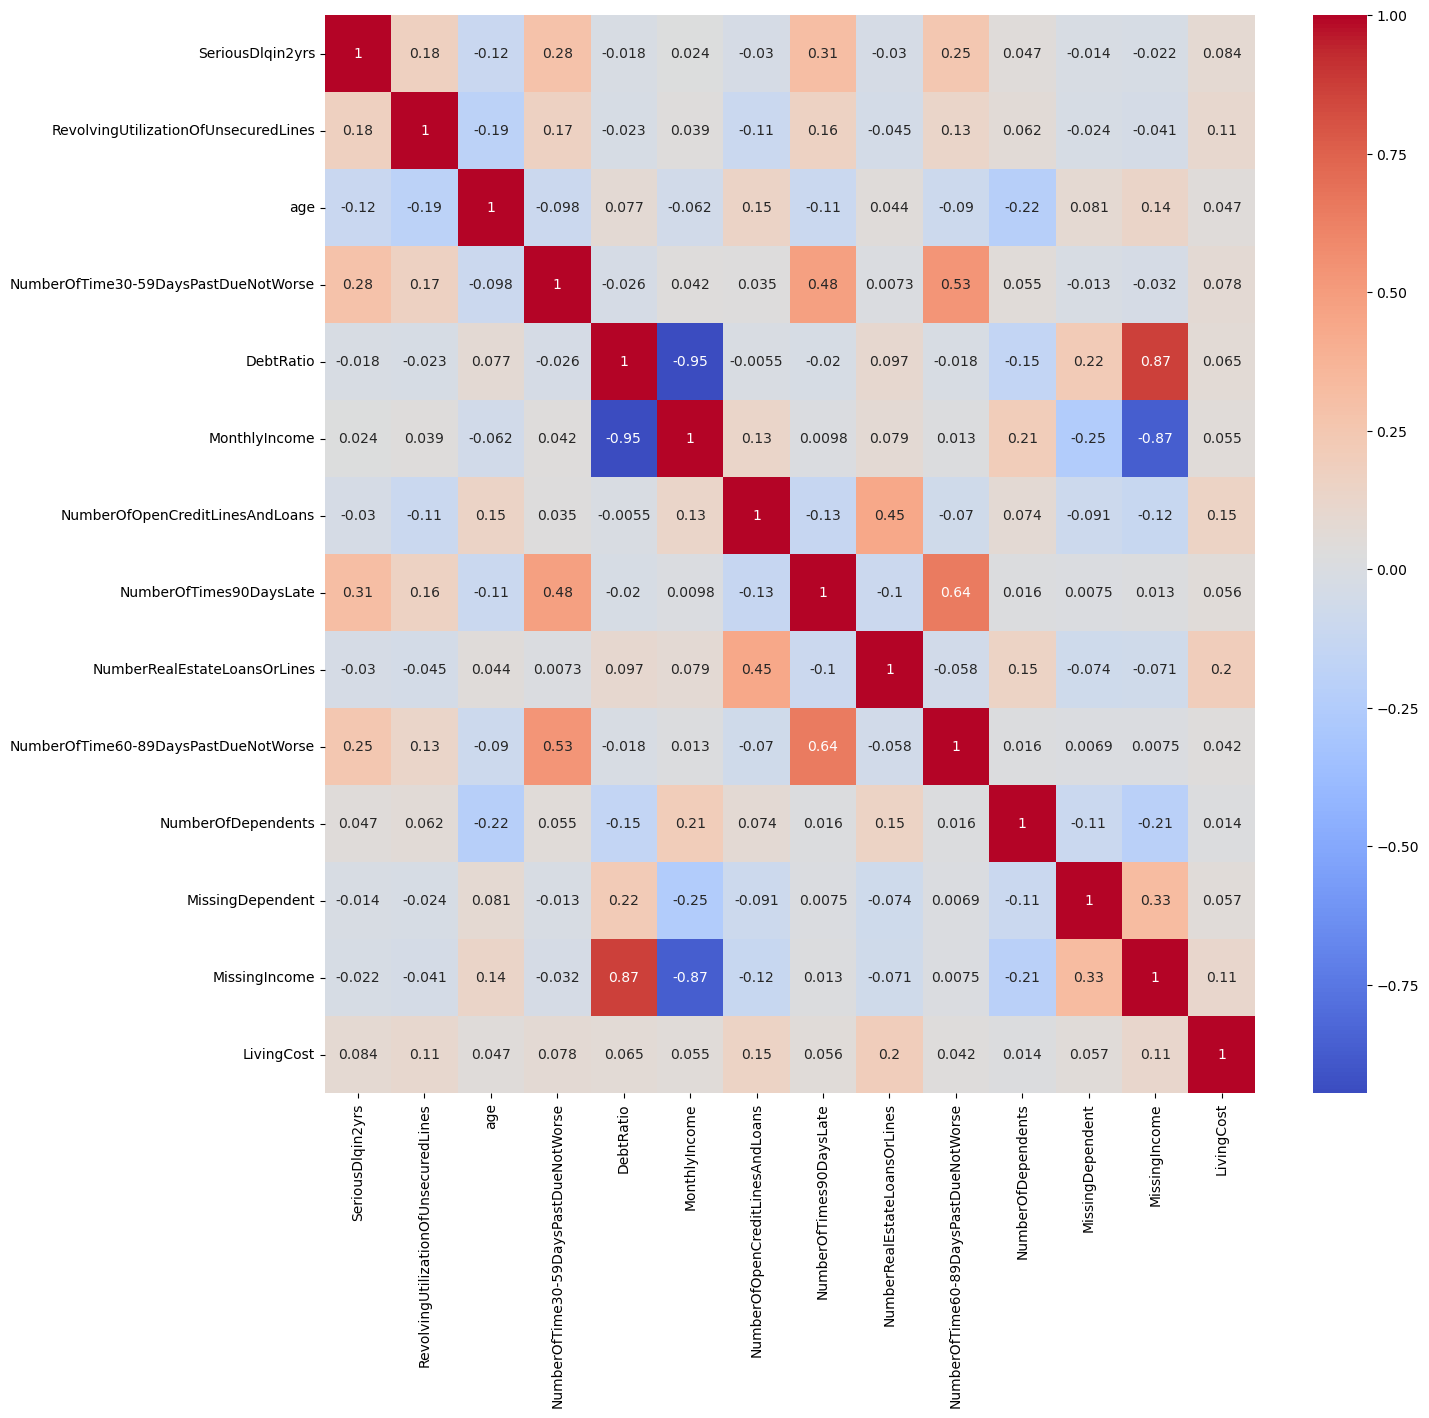

In [133]:
plt.figure(figsize=(15,14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [134]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load your cleaned dataset
# df = pd.read_csv('train.csv')  # already cleaned

# Separate features and target
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

# Split into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)



# Train Random Forest on resampled data
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train_res, y_train_res)

# Predict on validation set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     27987
           1       0.45      0.31      0.37      2004

    accuracy                           0.93     29991
   macro avg       0.70      0.64      0.66     29991
weighted avg       0.92      0.93      0.92     29991

ROC-AUC Score: 0.839969888714371
Confusion Matrix:
 [[27236   751]
 [ 1384   620]]
